In [1]:
from astropy.time import Time
from astropy import units as u
from poliastro.bodies import Earth, Mars, Sun, Jupiter, Saturn
from poliastro.twobody import Orbit
from poliastro.plotting.static import StaticOrbitPlotter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from astropy.coordinates import SphericalRepresentation
from astropy.coordinates import CartesianRepresentation
import numpy as np
import math

#orbital elements
time = "2020-03-14T00:00:00"
time2 = "2020-05-31T00:51:39"
t = Time(time, format='isot', scale='tdb')
t2 = Time(time2, format='isot', scale='tdb')
a = 29489228424 * u.km
ecc = 0.99871621 * u.one
inc = 45.31898912 * u.deg
raan = 120.51143626815 * u.deg
argp = 177.46987924671 * u.deg
nu = 0 * u.deg
i = 0

#planets' elements
se = Orbit.from_body_ephem(Earth,t2)
sm = Orbit.from_body_ephem(Mars,t2)
sj = Orbit.from_body_ephem(Jupiter,t2)
ss = Orbit.from_body_ephem(Saturn,t2)
sc = Orbit.from_classical(Sun,a,ecc,inc,raan,argp,0 * u.deg,t2) #彗星现在位置
setemp = Orbit.from_classical(Sun,se.a,se.ecc,se.inc,se.raan,se.argp,se.nu,t2)
dinc = se.inc
#orbit circle
orbc = [[],[],[]] #comet[[xs],[ys],[zs]]
orbe = [[],[],[]] #earth
orbm = [[],[],[]] #mars
orbj = [[],[],[]] #jupiter
orbs = [[],[],[]] #saturn

#orbit per day
orbnc = [[],[],[]] #comet[[xs],[ys],[zs]]
orbne = [[],[],[]] #earth


#comet/planets position at some time
xn1 = []
yn1 = []
zn1 = []

r = []
d = []
for x in np.linspace(-60 * u.day,60 * u.day,120):
    orbnctemp = sc.propagate(x)
    pn1 = orbnctemp.represent_as(CartesianRepresentation)
    orbnc[0].append(pn1.x.value)
    orbnc[1].append(-pn1.y.value)
    orbnc[2].append(-pn1.z.value)
    xc = pn1.x.value / (1.5 * 10**8)
    yc = pn1.y.value / (1.5 * 10**8)
    zc = pn1.z.value / (1.5 * 10**8)
    orbnetemp = setemp.propagate(x)
    pn2 = orbnetemp.represent_as(CartesianRepresentation)
    orbne[0].append(pn2.x.value)
    orbne[1].append(-pn2.y.value)
    orbne[2].append(-pn2.z.value)
    xe = pn2.x.value / (1.5 * 10**8)
    ye = pn2.y.value / (1.5 * 10**8)
    ze = pn2.z.value / (1.5 * 10**8)
    r.append(math.sqrt(xc**2+yc**2+zc**2))
    d.append(math.sqrt((xe-xc)**2+(ye-yc)**2+(ze-zc)**2))
    


'''
for x in np.linspace(-30,30,10):
    orbn = Orbit.from_classical(Sun,a,ecc,inc,raan,argp,x * u.deg)
    pn1 = orbn.represent_as(CartesianRepresentation)
    xn1.append(pn1.x.value)
    yn1.append(-pn1.y.value)
    zn1.append(-pn1.z.value)
'''

orbn2 = Orbit.from_classical(Sun,se.a,se.ecc,se.inc - dinc,se.raan,se.argp,se.nu)
pn2 = orbn2.represent_as(CartesianRepresentation)
#planet now
#待添加除地球外其他行星
xn2 = pn2.x.value
yn2 = -pn2.y.value
zn2 = -pn2.z.value





#orbit path
for nu1 in np.linspace(0,360,300):
    orb = Orbit.from_classical(Sun,a,ecc,inc,raan,argp,nu1 * u.deg)
    #这里需要修改sj.inc-dinc为负数的问题
    #或者说这里是否需要-dinc（彗星倾角问题）
    orb2 = Orbit.from_classical(Sun,se.a,se.ecc,se.inc - dinc,se.raan,se.argp,nu1 * u.deg)
    orb3 = Orbit.from_classical(Sun,sm.a,sm.ecc,sm.inc - dinc,sm.raan,sm.argp,nu1 * u.deg)
    orb4 = Orbit.from_classical(Sun,sj.a,sj.ecc,(math.pi) * u.rad + sj.inc - dinc,sj.raan,sj.argp,nu1 * u.deg)
    orb5 = Orbit.from_classical(Sun,ss.a,ss.ecc,(math.pi) * u.rad + ss.inc - dinc,ss.raan,ss.argp,nu1 * u.deg)
    p1 = orb.represent_as(CartesianRepresentation)
    p2 = orb2.represent_as(CartesianRepresentation)
    p3 = orb3.represent_as(CartesianRepresentation)
    p4 = orb4.represent_as(CartesianRepresentation)
    p5 = orb5.represent_as(CartesianRepresentation)
    dis = (p1.x.value**2 + p1.y.value**2 + p1.z.value**2)**(1/2)
    if(dis < 3 * 1.5 * 10**9):
        orbc[0].append(p1.x.value)
        orbc[1].append(-p1.y.value)
        orbc[2].append(-p1.z.value)
    orbe[0].append(p2.x.value)
    orbe[1].append(-p2.y.value)
    orbe[2].append(-p2.z.value)
    orbm[0].append(p3.x.value)
    orbm[1].append(-p3.y.value)
    orbm[2].append(-p3.z.value)
    orbj[0].append(p4.x.value)
    orbj[1].append(-p4.y.value)
    orbj[2].append(-p4.z.value)
    orbs[0].append(p5.x.value)
    orbs[1].append(-p5.y.value)
    orbs[2].append(-p5.z.value)
    

    #print(count)

#plt.savefig("C:/Users/MizarZ/Desktop/plottry.png",dpi=300)

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


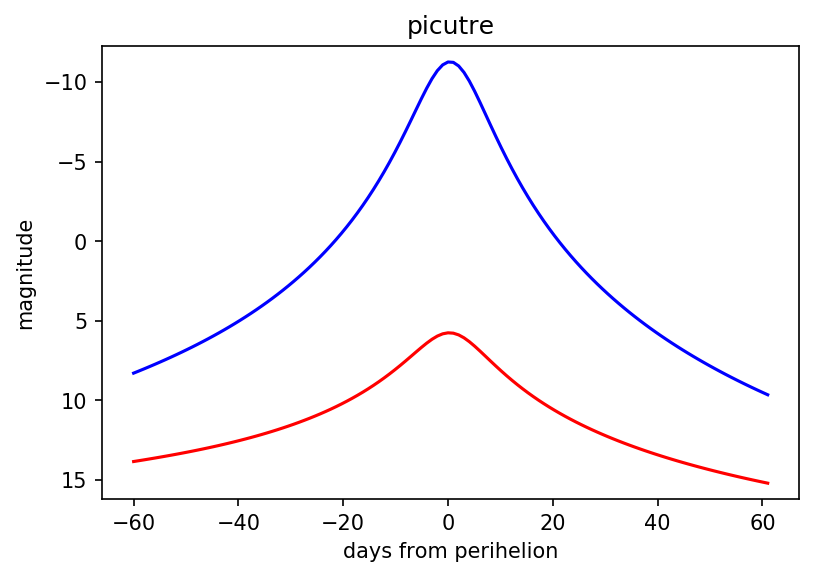

In [8]:
import matplotlib.pylab as plt
#m = M + 5lgd + klgr
M = 3.94
k = 25
y1 = []
y2 = []

for x in np.linspace(0,119,120):
    x = int(x)
    y1.append(M + 5 * math.log10(d[x]) + k * math.log10(r[x]))
    y2.append(12 + 5 * math.log10(d[x]) + 10 * math.log10(r[x]))
x = np.linspace(-60,61,120)
plt.figure(figsize = [6,4],dpi=150)
plt.xlabel('days from perihelion')
plt.ylabel('magnitude')
plt.title('picutre')
plt.plot(x,y1,color="blue")
plt.plot(x,y2,color="red")
#lim = y1.append(y2)
plt.ylim(max([max(y1),max(y2)])+1,min([min(y1),min(y2)])-1)
plt.savefig("figure.jpg")
plt.show()


In [6]:
r

[1.4692569417098653,
 1.4509069469505576,
 1.4324644533606292,
 1.4139277149397271,
 1.3952949336574354,
 1.3765642577185497,
 1.3577337798130584,
 1.3388015353625,
 1.319765500777395,
 1.300623591744218,
 1.2813736615649836,
 1.2620134995780803,
 1.2425408296958926,
 1.2229533091031362,
 1.2032485271701454,
 1.1834240046480553,
 1.1634771932283932,
 1.1434054755688843,
 1.1232061659110957,
 1.102876511445001,
 1.0824136946123288,
 1.061814836586174,
 1.0410770022215754,
 1.020197206843402,
 0.9991724253280837,
 0.9779996040496346,
 0.956675676404825,
 0.9351975828161607,
 0.9135622963462808,
 0.8917668553590337,
 0.8698084050515364,
 0.8476842501857317,
 0.8253919220046253,
 0.8029292631780564,
 0.7802945357541597,
 0.7574865585895182,
 0.7345048827222369,
 0.7113500158154983,
 0.6880237103803768,
 0.6645293353267043,
 0.640872356962311,
 0.617060964518537,
 0.5931068875234102,
 0.5690264690950964,
 0.544842082105213,
 0.5205840062115101,
 0.4962929253429305,
 0.4720232594996258,
 0.4

AttributeError: 'list' object has no attribute 'concat'

<IPython.core.display.Javascript object>


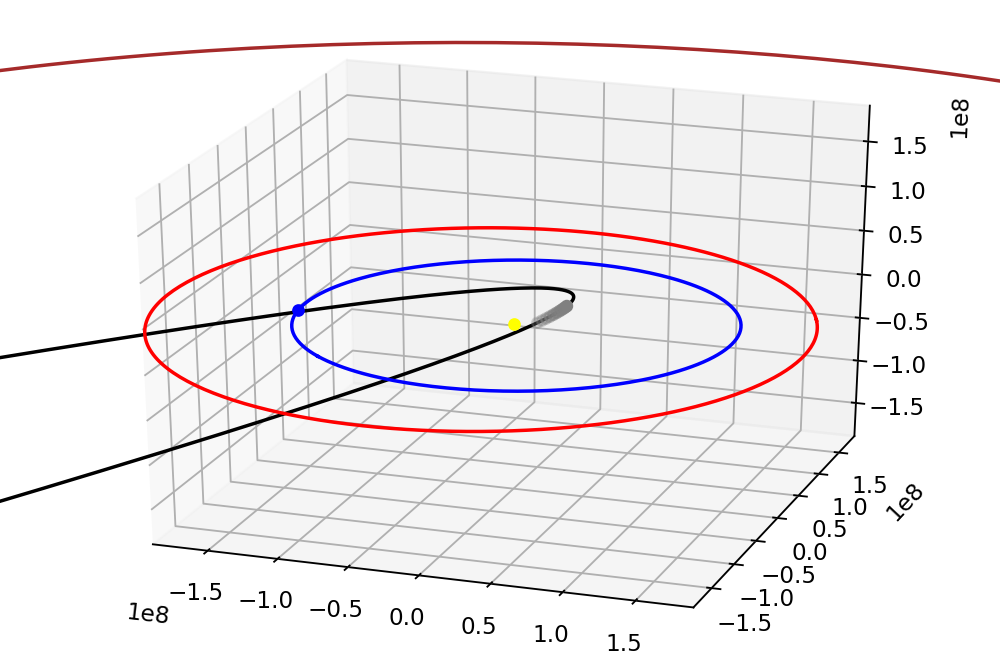

In [65]:
%matplotlib notebook
#ax1 = plt.axes(projection="3d")
fig = plt.figure(figsize=[6,4],dpi=100)
ax1 = Axes3D(fig)
lim = 3*149597871

ax1.set_xlim3d(-lim,lim)
ax1.set_ylim3d(-lim,lim)
ax1.set_zlim3d(-lim,lim)

ax1.plot3D(orbc[0],orbc[1],orbc[2],color="black")
ax1.plot3D(orbe[0],orbe[1],orbe[2],color="blue")
ax1.plot3D(orbm[0],orbm[1],orbm[2],color="red")
ax1.plot3D(orbj[0],orbj[1],orbj[2],color="brown")
ax1.plot3D(orbs[0],orbs[1],orbs[2],color="yellow")

ax1.scatter3D(0,0,0,color="yellow")
ax1.scatter3D(xn1,yn1,zn1,color="gray")
ax1.scatter3D(xn2,yn2,zn2,color="blue")

ax1.mouse_init()
plt.show()